In [1]:
%matplotlib inline

In [11]:
import numpy as np

In [2]:
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.visualization.scatter import Scatter


class PymooProblem(Problem):
    def __init__(self, search_space, f, n_obj):
        n_var = int(search_space.dimension)
        xl = search_space.lower.numpy()
        xu = search_space.upper.numpy()
        
        super().__init__(n_var=n_var, n_obj=n_obj, n_constr=0, xl=xl, xu=xu)
        
        self._f = f
        
    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = self._f(x)

        
def get_true_pf(problem, n_gen=1000):
    algorithm = NSGA2(pop_size=100)
    res = minimize(problem, algorithm, ('n_gen', n_gen), seed=1, verbose=False)

    return res.F
    
def plot_pf(pf):
    plot = Scatter()
    plot.add(pf, facecolor="none", edgecolor="red")
    plot.show()

In [3]:
import tensorflow as tf

import trieste
from trieste.objectives.single_objectives import hartmann_6, ackley_5
from trieste.types import TensorType


# Ackley funciton in Trieste is defined over 5d domain, and we want
def ackley_6(x: TensorType) -> TensorType:
    tf.debugging.assert_shapes([(x, (..., 6))])
    
    x_5d = x[..., :-1]

    return ackley_5(x_5d)


search_space = trieste.space.Box([0]*6, [1]*6)

def f(x):
    return tf.concat([hartmann_6(x), ackley_6(x)], axis=-1)

2021-12-07 10:03:36.166932: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-07 10:03:36.166987: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-12-07 10:03:37.869197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-07 10:03:37.869277: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-07 10:03:37.869310: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-MGDBU2G): /proc/driver/nvidia/version does not exist
2021-12-07 10:03:37.869688: I tensorflow/core/platform/cpu_fe

In [4]:
problem = PymooProblem(search_space, f, n_obj=2)
true_pf = get_true_pf(problem)
plot_pf(true_pf)

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.show()

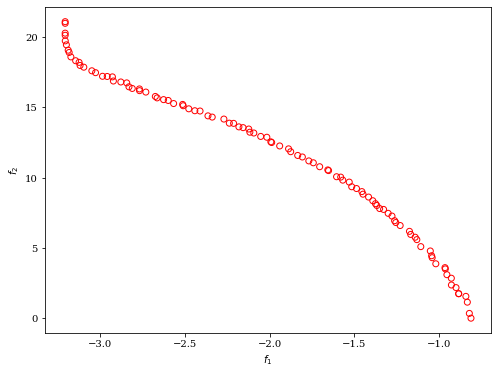

In [7]:
plot = Scatter()
plot.add(true_pf, facecolor="none", edgecolor="red")
plot.show()

In [15]:
true_pf

array([[-3.20315730e+00,  2.11065618e+01],
       [-8.14089809e-01,  8.57914808e-03],
       [-1.02117223e+00,  3.87895638e+00],
       [-1.23110022e+00,  6.60164560e+00],
       [-1.94026620e+00,  1.22633709e+01],
       [-8.23735242e-01,  3.47590742e-01],
       [-2.26872174e+00,  1.41760733e+01],
       [-1.70488541e+00,  1.07850092e+01],
       [-1.10952331e+00,  5.09982346e+00],
       [-1.17622140e+00,  6.18713848e+00],
       [-1.60543022e+00,  1.00730603e+01],
       [-2.33745702e+00,  1.43169709e+01],
       [-8.44179954e-01,  1.55965982e+00],
       [-3.09345781e+00,  1.78679393e+01],
       [-1.88796866e+00,  1.20563937e+01],
       [-1.83419256e+00,  1.15874449e+01],
       [-1.76867713e+00,  1.11987115e+01],
       [-2.05203752e+00,  1.29410318e+01],
       [-1.41696723e+00,  8.62590022e+00],
       [-1.74229230e+00,  1.10654547e+01],
       [-9.55844380e-01,  3.10413309e+00],
       [-9.29766615e-01,  2.85300516e+00],
       [-1.80673123e+00,  1.14783492e+01],
       [-2.

In [12]:
np.savetxt("hartmann_ackley_6.csv", true_pf, delimiter=",")

In [13]:
read_pf = np.genfromtxt('hartmann_ackley_6.csv', delimiter=',')

In [16]:
read_pf == true_pf

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ Tr